In [20]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
#Initial example with just Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
m = Prophet(weekly_seasonality=False) 
m.fit(df, )
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyszupmny/83wvndcl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyszupmny/vxjp_5t3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5799', 'data', 'file=/tmp/tmpyszupmny/83wvndcl.json', 'init=/tmp/tmpyszupmny/vxjp_5t3.json', 'output', 'file=/tmp/tmpyszupmny/prophet_modelotrmwje4/prophet_model-20230529224921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:49:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:49:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


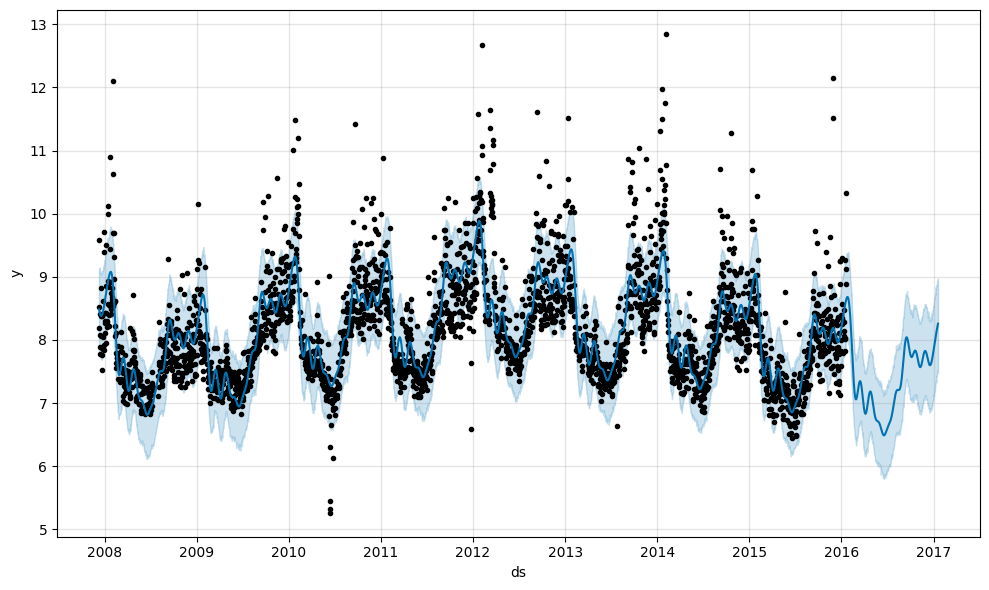

In [22]:
m.plot(forecast)
plt.show()

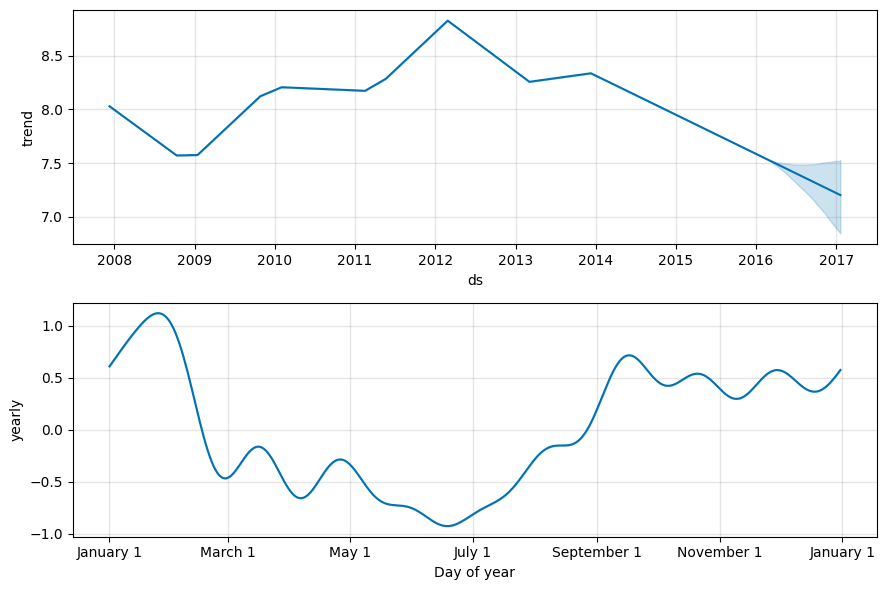

In [23]:
m.plot_components(forecast)
plt.show()

In [24]:
#ProphetLite only works with numpy arrays due to numba implementations
y = df['y'].values

In [25]:
!pip install ProphetLite==0.0.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from ProphetLite.prophetlite import ProphetLite

In [27]:
pl = ProphetLite()
fitted = pl.fit(y, [365.25])
predicted = pl.predict(365)

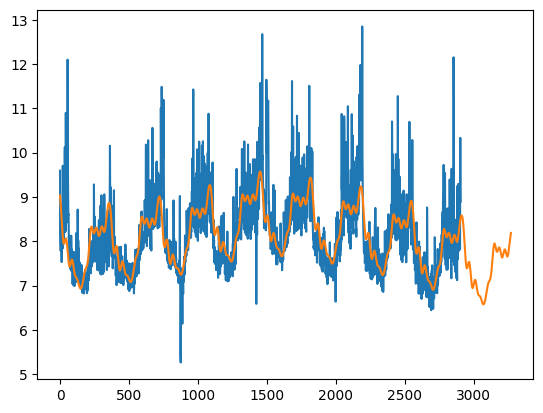

In [28]:
pl.plot()

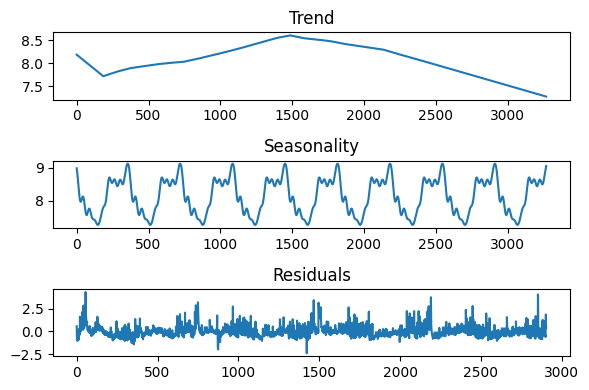

In [29]:
pl.plot_components()

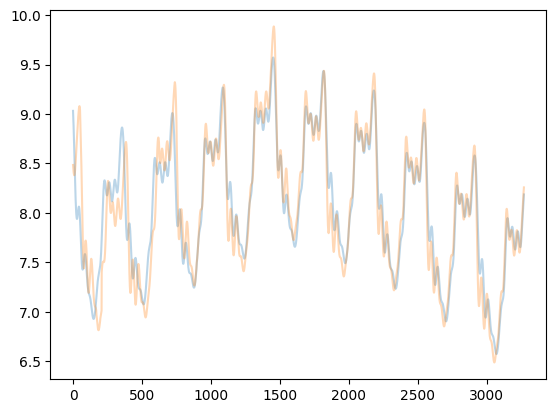

In [30]:
plt.plot(np.append(fitted['yhat'], predicted['yhat']), alpha=.3)
plt.plot(forecast['yhat'], alpha=.3)
plt.show()

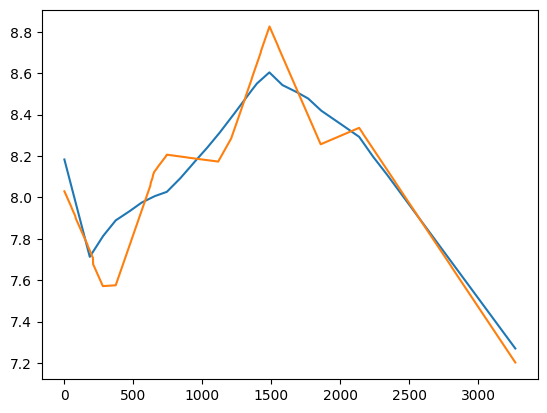

In [31]:
plt.plot(np.append(fitted['trend'], predicted['trend']))
plt.plot(forecast['trend'])
plt.show()